# SP500 Dynamic Analyses
- Dynamic Constituent Analysis by decade and sectors
- Short Term vs Long Term Price Returns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/dgroner/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
filename_prices = 'SP500_Adjusted_Prices_20230101.csv'
filename_constituents = 'SP500_Constituents_20230101.csv'

In [3]:
# read the data from a csv file into a DataFrame
# read the file with historical adjusted price
df_adjprice = pd.read_csv(filename_prices)
df_adjprice.head(10)

,Symbol,Date,Adjusted_price
0,MMM,2017-12-29,198.84085
1,MMM,2019-12-31,158.14842
2,MMM,2021-12-31,170.40469
3,MMM,2022-06-30,126.61288
4,MMM,2022-09-30,109.22110
5,MMM,2022-11-30,125.97000
6,MMM,2022-12-30,119.92000
7,AOS,2017-12-29,56.09538
8,AOS,2019-12-31,45.04146
9,AOS,2021-12-31,84.26850


In [4]:
# what are the unique dates inthe pricing history
adj_price_date = df_adjprice['Date'].unique().tolist()
adj_price_date

['2017-12-29',
 '2019-12-31',
 '2021-12-31',
 '2022-06-30',
 '2022-09-30',
 '2022-11-30',
 '2022-12-30']

In [5]:
# assumes a certain structure of the pricing history
# 5yr, 3yr, 1yr, 6mo, 3mo, 1mo, latest
t5yr  = adj_price_date[0]
t3yr  = adj_price_date[1]
t1yr  = adj_price_date[2]
t6mo  = adj_price_date[3]
t3mo  = adj_price_date[4]
t1mo  = adj_price_date[5]
tlast = adj_price_date[6]

In [6]:
# Rotating the data to 1 row per stock
df_adj_pivot = df_adjprice.pivot(index = 'Symbol', columns = 'Date')
df_adj_pivot.head()

Adjusted_price                                                         \
Date       2017-12-29 2019-12-31 2021-12-31 2022-06-30 2022-09-30 2022-11-30   
Symbol                                                                         
A            64.48848   83.61806  158.39783  118.17892  121.15931  154.74921   
AAL          50.71188   28.57440   17.96000   12.68000   12.04000   14.43000   
AAP          93.71779  151.05016  231.54367  169.76926  154.70532  149.41127   
AAPL         40.23018   71.92056  176.54536  136.30424  137.97112  148.03000   
ABBV         76.67210   77.05365  130.32254  150.21217  132.85812  161.17999   

                   
Date   2022-12-30  
Symbol             
A       149.64999  
AAL      12.72000  
AAP     147.03000  
AAPL    129.92999  
ABBV    161.61000

In [7]:
# reset the column names and the index
df_adj_pivot.columns = [date for name, date in df_adj_pivot.columns]
df_adj_pivot.reset_index()
df_adj_pivot.head()

,2017-12-29,2019-12-31,2021-12-31,2022-06-30,2022-09-30,2022-11-30,2022-12-30
Symbol,,,,,,,
A,64.48848,83.61806,158.39783,118.17892,121.15931,154.74921,149.64999
AAL,50.71188,28.57440,17.96000,12.68000,12.04000,14.43000,12.72000
AAP,93.71779,151.05016,231.54367,169.76926,154.70532,149.41127,147.03000
AAPL,40.23018,71.92056,176.54536,136.30424,137.97112,148.03000,129.92999
ABBV,76.67210,77.05365,130.32254,150.21217,132.85812,161.17999,161.61000


In [8]:
# read SP500 constituents file
dfsp = pd.read_csv(filename_constituents)
dfsp.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [9]:
# combine two dataframes (constituents + pricing)
df_join = pd.merge(df_adj_pivot,dfsp, how = 'left', on = 'Symbol')
df_join.head()

,Symbol,2017-12-29,2019-12-31,2021-12-31,2022-06-30,2022-09-30,2022-11-30,2022-12-30,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,A,64.48848,83.61806,158.39783,118.17892,121.15931,154.74921,149.64999,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
1,AAL,50.71188,28.57440,17.96000,12.68000,12.04000,14.43000,12.72000,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201,1934
2,AAP,93.71779,151.05016,231.54367,169.76926,154.70532,149.41127,147.03000,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
3,AAPL,40.23018,71.92056,176.54536,136.30424,137.97112,148.03000,129.92999,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977
4,ABBV,76.67210,77.05365,130.32254,150.21217,132.85812,161.17999,161.61000,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)


In [10]:
# read stock sector file to dataframe
df_sector = pd.read_csv('sectors.csv')
df_sector

,label,category,name
0,COMM,TECHCOMM,Communication Services
1,CNDI,CON,Consumer Discretionary
2,CNST,CON,Consumer Staples
3,ENGY,ENGYUTIL,Energy
4,FIN,FINRE,Financials
5,HLTH,HLTH,Health Care
6,IND,INDMAT,Industrials
7,TECH,TECHCOMM,Information Technology
8,MAT,INDMAT,Materials
9,RE,FINRE,Real Estate


In [11]:
# add category column to the dataframe
df_join = pd.merge(df_join, df_sector, left_on = 'GICS Sector', right_on = 'name', how = 'left')
df_join = df_join.drop(['label','name'], axis = 1)
df_join.head()

,Symbol,2017-12-29,2019-12-31,2021-12-31,2022-06-30,2022-09-30,2022-11-30,2022-12-30,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,category
0,A,64.48848,83.61806,158.39783,118.17892,121.15931,154.74921,149.64999,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999,HLTH
1,AAL,50.71188,28.57440,17.96000,12.68000,12.04000,14.43000,12.72000,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201,1934,INDMAT
2,AAP,93.71779,151.05016,231.54367,169.76926,154.70532,149.41127,147.03000,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932,CON
3,AAPL,40.23018,71.92056,176.54536,136.30424,137.97112,148.03000,129.92999,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,TECHCOMM
4,ABBV,76.67210,77.05365,130.32254,150.21217,132.85812,161.17999,161.61000,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),HLTH


In [12]:
# determine price return, given:
#  df - DataFrame
#  tend - date label of end date
#  tstart - date label of start date
#  t - time in years of period
def ret(df, tend, tstart, t):
    end = df[tend]
    start = df[tstart]
    nomret = (end-start) / start
    return nomret

In [13]:
# add selected return columns to the dataframe, in %
#sentinel = np.nan
df_join['ret6mo'] = ret(df_join, tlast, t6mo, 1/2) * 100
df_join['ret4.5yr'] = ret(df_join, t6mo, t5yr, 4.5) * 100

In [14]:
df_join.head()

,Symbol,2017-12-29,2019-12-31,2021-12-31,2022-06-30,2022-09-30,2022-11-30,2022-12-30,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,category,ret6mo,ret4.5yr
0,A,64.48848,83.61806,158.39783,118.17892,121.15931,154.74921,149.64999,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999,HLTH,26.630020,83.255862
1,AAL,50.71188,28.57440,17.96000,12.68000,12.04000,14.43000,12.72000,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201,1934,INDMAT,0.315457,-74.995997
2,AAP,93.71779,151.05016,231.54367,169.76926,154.70532,149.41127,147.03000,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932,CON,-13.394215,81.149449
3,AAPL,40.23018,71.92056,176.54536,136.30424,137.97112,148.03000,129.92999,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,TECHCOMM,-4.676487,238.810913
4,ABBV,76.67210,77.05365,130.32254,150.21217,132.85812,161.17999,161.61000,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),HLTH,7.587821,95.915033


/Users/dgroner/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


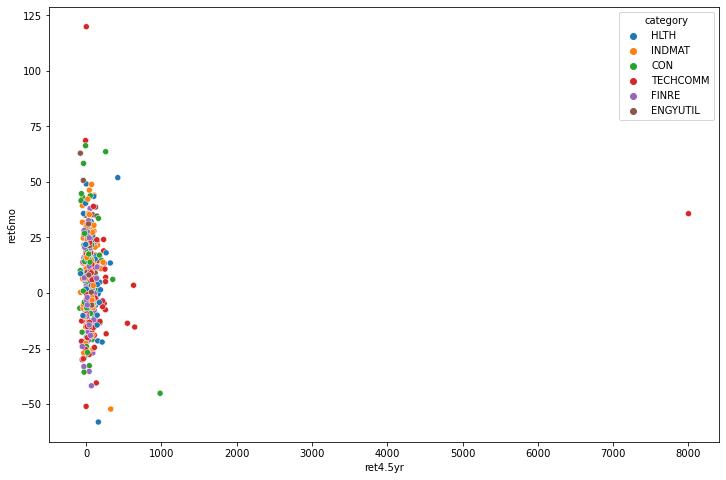

In [15]:
# create a scatter plot with x: 4.5 years return & y: 6 month return
# compares the performance of stocks by category between long and short term returns
plt.subplots(figsize=(12,8))
sns.scatterplot('ret4.5yr', 'ret6mo', data=df_join, hue='category')
plt.show()

In [21]:
df_join[df_join['ret4.5yr'] > 1000]

,Symbol,2017-12-29,2019-12-31,2021-12-31,2022-06-30,2022-09-30,2022-11-30,2022-12-30,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,category,ret6mo,ret4.5yr
159,ENPH,2.41,26.13,182.94,195.24001,277.47,320.59,264.95999,Enphase,reports,Information Technology,Electronic Components,"Fremont, California",2021-01-07,1463101,2006,TECHCOMM,35.709883,8001.245228


In [16]:
# create a dataframe with the 20 largest 6 month returns
df_top = df_join.nlargest(20,'ret6mo')
# create a dataframe with the 20 smallest 6 month returns
df_bottom = df_join.nsmallest(20,'ret6mo')

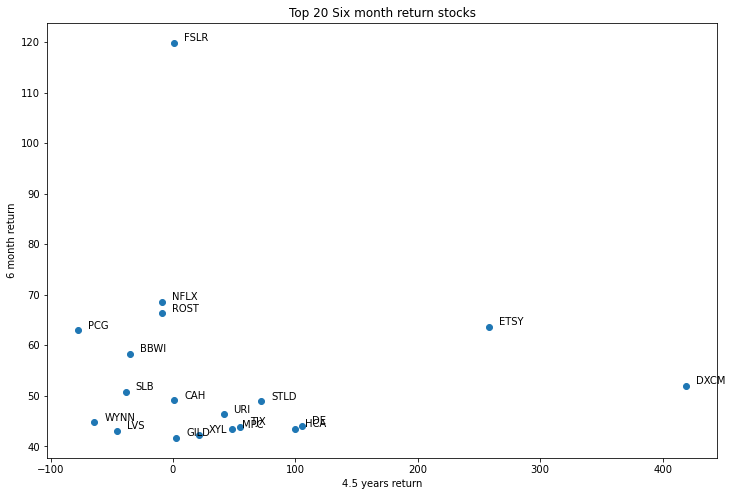

In [17]:
# create a scatter plot with x: 4.5 years return & y: 6 month return
# compares the performance of highest 20 stocks between long and short term returns
x_top = df_top['ret4.5yr']
y_top = df_top['ret6mo']
labels_top = df_top['Symbol']

# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(12, 8))

# Plot the scatter points
ax.scatter(x_top, y_top)

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x_top, y_top, labels_top):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(10, 5),    
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
plt.title('Top 20 Six month return stocks')
plt.xlabel('4.5 years return')
plt.ylabel('6 month return')
plt.show()

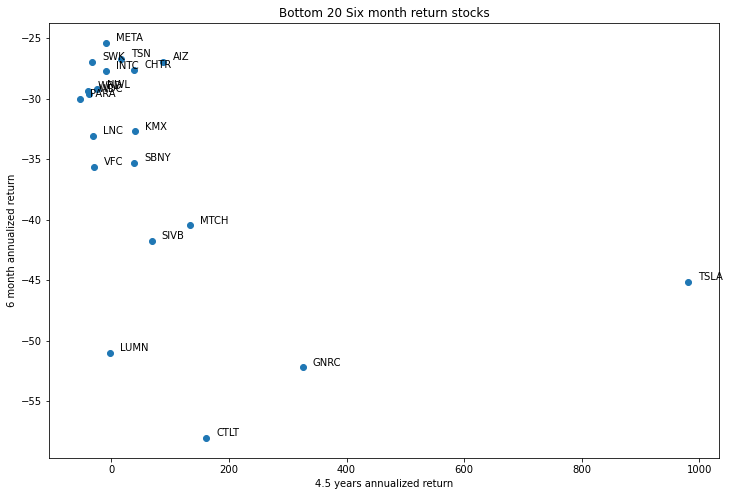

In [18]:
# create a scatter plot with x: 4.5 years return & y: 6 month return
# compares the performance of lowest 20 stocks between long and short term returns
x_bottom = df_bottom['ret4.5yr']
y_bottom = df_bottom['ret6mo']
labels_bottom = df_bottom['Symbol']

# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(12, 8))

# Plot the scatter points
ax.scatter(x_bottom, y_bottom)

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x_bottom, y_bottom, labels_bottom):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(10, 5),    
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
plt.title('Bottom 20 Six month return stocks')
plt.xlabel('4.5 years annualized return')
plt.ylabel('6 month annualized return')
plt.show()